# Intel Image Classification

In this project, we will be working on Intel images i.e. images of buildings, forest, street, etc. We will built a convolutional neural network and train it on this images. This is a multi class classification problem and we will use Keras.

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/MyDrive/Intel Image Dataset"

buildings  forest  glacier  mountain  sea  street


In [4]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Listing directory
!ls "/content/drive/My Drive/Intel Image Dataset/"

buildings  forest  glacier  mountain  sea  street


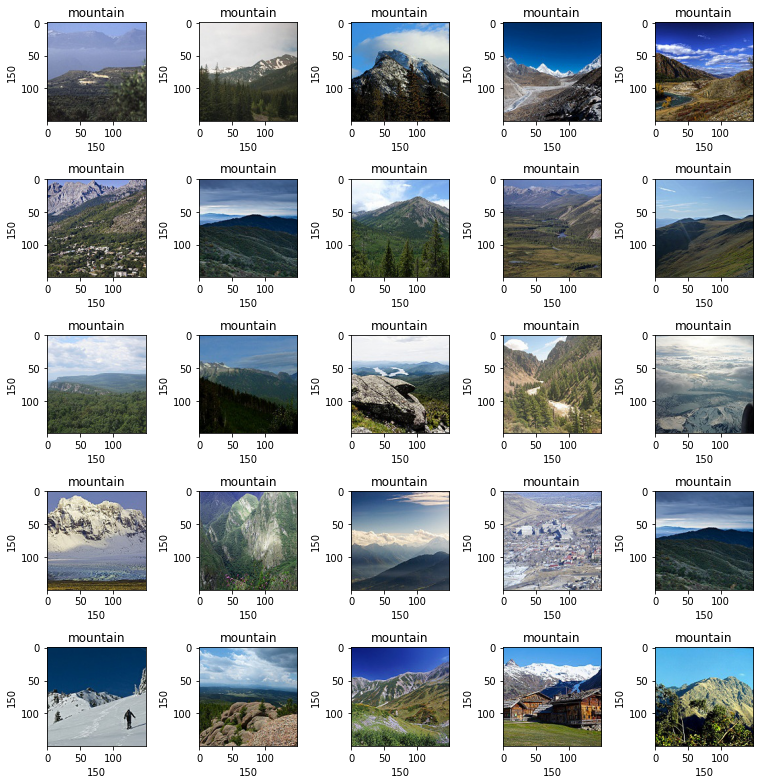

In [7]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "/content/drive/My Drive/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Let's visualize some of the mountain images that we will be working on. Also we will observe x and y dimensions of the image.

In [8]:
# Setting root directory path and creating empty list
dir = "/content/drive/My Drive/Intel Image Dataset/"
root_dir = listdir(dir)
image_list, label_list = [], []

Setting the root directory for the dataset and storing all the folders name of the dataset. We will also create 2 empty list for image and lables.

In [9]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Next we need to resize images as some of the images don't have same dimensions. So, we will read and resize all the images. Then we will convert it into array and appending the list created above with the image and its label.

In [10]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
street       511
sea          510
forest       474
buildings    437
dtype: int64

Checking for images per class.

In [11]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

Storing the number of classes which will be used further in model architecture.

In [12]:
# Checking x data shape
np.array(image_list).shape

(3010, 150, 150, 3)

Check the shape of the x data for input layer of model architecture.

In [13]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3010,)

Checking the number of labels in y data which should be equal to total number of images.

In [14]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now we will split our dataset into testing and training using train_test_split() from sklearn.

In [15]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

Next we will normalize the images by dividing them with 255 and we will also reshape x_train and x_test data. 

In [16]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [17]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [18]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [19]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics. Here we will use loss as categorical_crossentropy, optimizer as Adam and metrics as accuracy.

In [20]:
# Training the model
epochs = 100
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/100
16/16 [==============================] - 17s 200ms/step - loss: 1.5946 - accuracy: 0.3967 - val_loss: 1.7410 - val_accuracy: 0.2531
Epoch 2/100
16/16 [==============================] - 2s 128ms/step - loss: 1.2517 - accuracy: 0.5452 - val_loss: 1.7669 - val_accuracy: 0.2739
Epoch 3/100
16/16 [==============================] - 2s 128ms/step - loss: 1.1060 - accuracy: 0.6002 - val_loss: 1.7889 - val_accuracy: 0.3133
Epoch 4/100
16/16 [==============================] - 2s 129ms/step - loss: 1.0224 - accuracy: 0.6578 - val_loss: 1.7949 - val_accuracy: 0.3050
Epoch 5/100
16/16 [==============================] - 2s 137ms/step - loss: 0.9452 - accuracy: 0.6807 - val_loss: 1.8104 - val_accuracy: 0.2116
Epoch 6/100
16/16 [==============================] - 2s 127ms/step - loss: 0.9165 - accuracy: 0.7004 - val_loss: 1.8569 - val_accuracy: 0.1784
Epoch 7/100
16/16 [==============================] - 2s 129ms/step - loss: 0.8541 - accuracy: 0.7186 - val_loss: 1.8530 - val_accuracy: 0.278

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 70 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [21]:
# Saving model
model.save("/content/drive/My Drive/intel_image.h5")

We will save the model using model.save() to use it later for prediction.

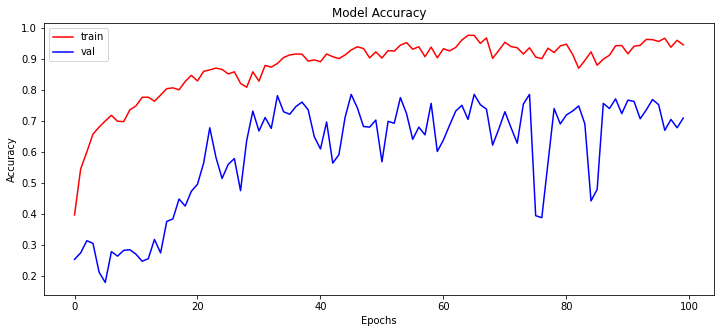

In [22]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.



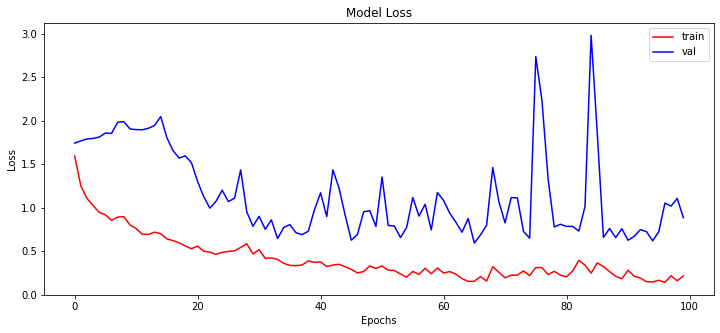

In [23]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the loss of the model for the training history.



In [24]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 1s 23ms/step - loss: 0.8485 - accuracy: 0.7126
Test Accuracy: 71.26246094703674


Evaluating the model to know the accuracy of the model on the test data.

In [25]:
# Storing model predictions
y_pred = model.predict(x_test)

Generating predictions for test data and storing them into y_pred.

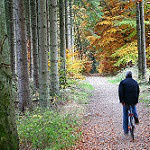

In [26]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

Visualizing an image to be predicted in further steps.

In [28]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  forest
Predicted :  forest
